In [1]:
# do the imports

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
nltk_stops = stopwords.words('english')

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_colwidth', 99)

%matplotlib inline

In [2]:
df = pd.read_csv('../../datasets/df_onion_not_onion.csv')

In [3]:
df.head()

,title,source
0,"'Buddhist aliens' have visited 'Thailand’s Area 51' and predicted World War 3 - ""Police have tr...",1
1,Disturbing: This Man Is Wearing Socks In The Grass,1
2,Bold Move: Hulu Has Announced That They’re Gonna Go Ahead And Reboot ‘Shrill’ While It’s Still ...,1
3,Gun Control Fail: This Duck Found A Gun In A Bush And Is Now Pushing It Around The Park With It...,1
4,3M Releases Command Self-Adhesive Meat Hooks For Serial Killers Trying To Reduce Clutter,1


In [4]:
df_onion = df[df['source'] == 1]

In [5]:
df_not_onion = df[df['source'] == 0]
df_not_onion.shape

(5000, 2)

In [6]:
cv = CountVectorizer(stop_words= nltk_stops)

df_onion_features = pd.DataFrame(cv.fit_transform(df_onion['title']).todense(), \
                          columns=cv.get_feature_names())
df_onion_features.head()


,000,05,06,10,100,104,106,10s,11,1106,...,zone,zoo,zookeeper,zoologists,zuckerberg,zumba,zumtrel,zz,đồ,đục
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:

df_not_onion_features = pd.DataFrame(cv.fit_transform(df_not_onion['title']).todense(), \
                          columns=cv.get_feature_names())
df_not_onion_features.head()


,000,000d6,03,05,050,06c11b92f92d427a8a38b5f1ab583080,09,0x,10,100,...,कश,जम,नव,पर,बड,बहस,मगर,वस,सबक,हन
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


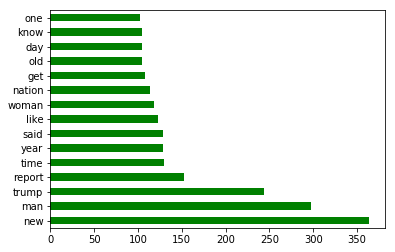

In [8]:

fig = plt.figure()
df_onion_features.sum().sort_values(ascending=False).head(15).plot.barh(color= 'Green');
fig.savefig('onion_bar.png')

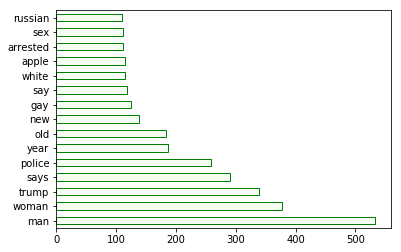

In [9]:
fig = plt.figure()
df_not_onion_features.sum().sort_values(ascending=False).head(15).plot.barh(cmap= 'Greens', edgecolor= 'Green');
fig.savefig('not_onion_bar.png')

In [10]:
df_features = pd.DataFrame(cv.fit_transform(df['title']).todense(), \
                          columns=cv.get_feature_names())
df_features.head()


,000,000d6,03,05,050,06,06c11b92f92d427a8a38b5f1ab583080,09,0x,10,...,कश,जम,नव,पर,बड,बहस,मगर,वस,सबक,हन
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
common_words = df_features.sum().sort_values(ascending=False).head(15).index

In [12]:
common_words

Index(['man', 'trump', 'new', 'woman', 'says', 'year', 'old', 'police',
       'white', 'report', 'one', 'time', 'get', 'people', 'school'],
      dtype='object')

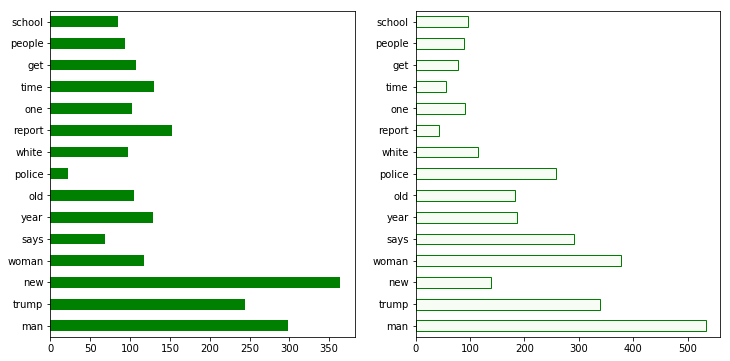

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

df_onion_features[common_words].sum().plot.barh(ax=ax1, color='Green')

df_not_onion_features[common_words].sum().plot.barh(ax=ax2, cmap='Greens', edgecolor= 'Green')

fig.savefig('onion_not_onion_common.png')

In [14]:
scores = [('SIA/LogReg', 0.5656),
         ('CV/SIA/LogReg', 0.8283),
         ('CV/SIA/Poly/LogReg', 0.8333),
         ('CV/SIA/Poly/Lasso', 0.6520),
         ('CV/SAI/Poly/Ridge', 0.6572),
         ('CV/SIA/Poly/Elast', 0.6572),
         ('CV/MultiNB', 0.8386),
         ('TFIDF/LogReg', 0.8386),
         ('TFIDF/MultiNB', 0.8412),
         ('TFIDF/Gauss', 0.7994),
         ('TFIDF/Ada(DT)/GB/DT/KNN/Voter', 0.7872),
         ('TDIDF/Ada(DT)/GB/Voter', 0.7516),
         ('TDIDF/RandFor', 0.8072)]
labels = ['method', 'cr_val_score']

df_results = pd.DataFrame.from_records(scores, columns= labels)

In [15]:
df_results

,method,cr_val_score
0,SIA/LogReg,0.5656
1,CV/SIA/LogReg,0.8283
2,CV/SIA/Poly/LogReg,0.8333
3,CV/SIA/Poly/Lasso,0.6520
4,CV/SAI/Poly/Ridge,0.6572
5,CV/SIA/Poly/Elast,0.6572
6,CV/MultiNB,0.8386
7,TFIDF/LogReg,0.8386
8,TFIDF/MultiNB,0.8412
9,TFIDF/Gauss,0.7994


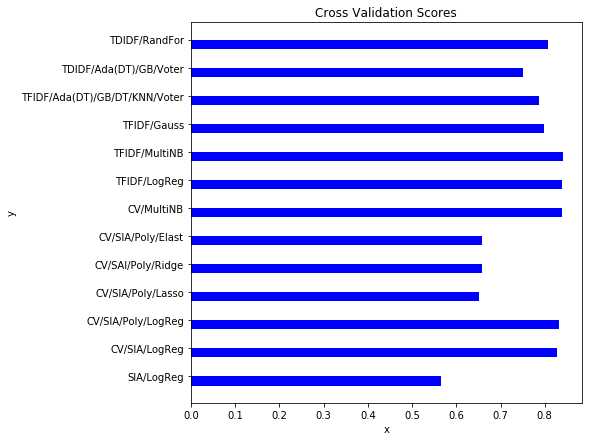

In [16]:
x = df_results['method']
y = df_results['cr_val_score']


fig, ax = plt.subplots(figsize= (7,7))    
width = 0.35
ind = np.arange(len(y)) 
ax.barh(ind, y, width, color= 'blue')
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Cross Validation Scores')
plt.xlabel('x')
plt.ylabel('y')      

plt.savefig('results.png')
